# Load and preprocess data

In [1]:
# Load in dataset

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/silag/OneDrive/Desktop/DataMining/letter_recognition_data.csv")

df.head()

,response,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [2]:
# H&K train-test split
hk_data = df[(df['response'] == 'H') | (df['response'] == 'K')]
y_hk = hk_data['response']
x_hk = hk_data.drop('response', axis=1)
x_train_hk, x_test_hk, y_train_hk, y_test_hk = train_test_split(x_hk, y_hk, test_size=0.1, random_state=63130)

# M&Y train-test split
my_data = df[(df['response'] == 'M') | (df['response'] == 'Y')]
y_my = my_data['response']
x_my = my_data.drop('response', axis=1)
x_train_my, x_test_my, y_train_my, y_test_my = train_test_split(x_my, y_my, test_size=0.1, random_state=63130)

# D&N train-test split
dn_data = df[(df['response'] == 'D') | (df['response'] == 'N')]
y_dn = dn_data['response']
x_dn = dn_data.drop('response', axis=1)
x_train_dn, x_test_dn, y_train_dn, y_test_dn = train_test_split(x_dn, y_dn, test_size=0.1, random_state=63130)

# Model 1: K-nearest neighbors

In [3]:
# Determine the number of neighbors with the highest accuracy
def knn(x_train, x_test, y_train, y_test):
    
    avg_accuracy = []
    for i in range(1,20):
        
        # 5-fold cross-validation
        kf = KFold(n_splits=5)
        score_array = []
        for train, test in kf.split(x_train):
        
            # Create KNN classifier
            knn = KNeighborsClassifier(n_neighbors=i)

            # Train model
            knn.fit(x_train[train], y_train[train])
            
            # Evaluate model accuracy
            score = knn.score(x_train[test], y_train[test])
            score_array.append(score)            
            
        score_avg = np.mean(score_array)
        avg_accuracy.append(score_avg)
        
    return(avg_accuracy)

Number of neighbors with highest accuracy: 1
Accuracy: 0.9562264150943396


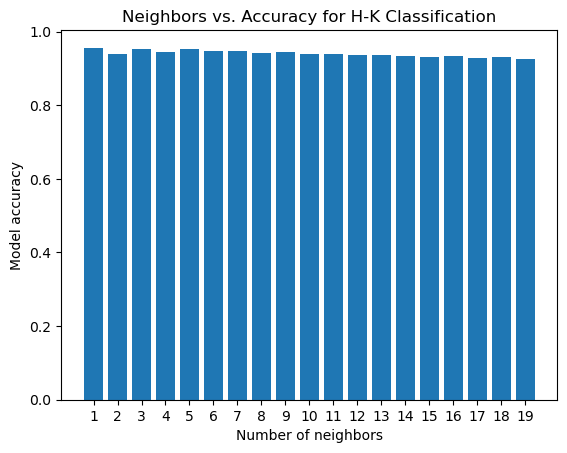

In [4]:
# Ideal number of neighbors for H-K classification
avg_hk = knn(x_train_hk.values, x_test_hk.values, y_train_hk.values, y_test_hk.values)
plt.bar(range(1,20), avg_hk)
plt.xticks(range(1,20))
plt.xlabel("Number of neighbors")
plt.ylabel("Model accuracy")
plt.title("Neighbors vs. Accuracy for H-K Classification")

high_hk = np.max(avg_hk)
index_hk = avg_hk.index(high_hk) + 1
print("Number of neighbors with highest accuracy: " + str(index_hk))
print("Accuracy: " + str(high_hk))

Number of neighbors with highest accuracy: 1
Accuracy: 1.0


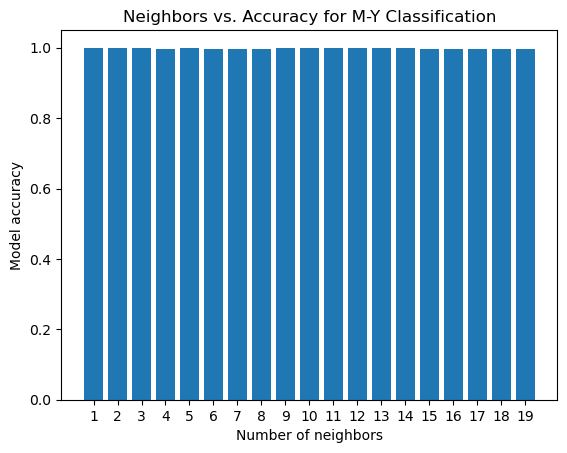

In [5]:
# Ideal number of neighbors for M-Y classification
avg_my = knn(x_train_my.values, x_test_my.values, y_train_my.values, y_test_my.values)
plt.bar(range(1,20), avg_my)
plt.xticks(range(1,20))
plt.xlabel("Number of neighbors")
plt.ylabel("Model accuracy")
plt.title("Neighbors vs. Accuracy for M-Y Classification")

high_my = np.max(avg_my)
index_my = avg_my.index(high_my) + 1
print("Number of neighbors with highest accuracy: " + str(index_my))
print("Accuracy: " + str(high_my))

Number of neighbors with highest accuracy: 1
Accuracy: 0.9915961231750705


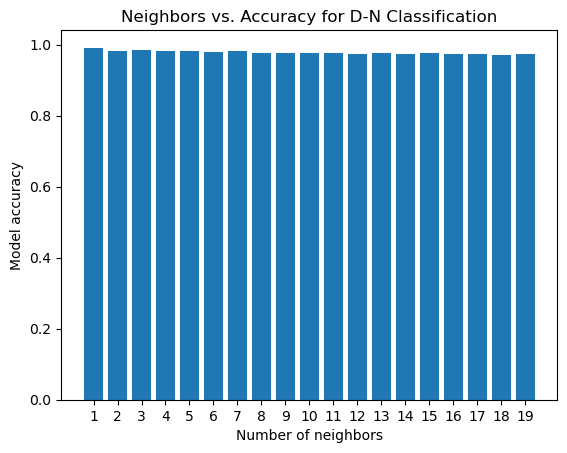

In [6]:
# Ideal number of neighbors for D-N classification
avg_dn = knn(x_train_dn.values, x_test_dn.values, y_train_dn.values, y_test_dn.values)
plt.bar(range(1,20), avg_dn)
plt.xticks(range(1,20))
plt.xlabel("Number of neighbors")
plt.ylabel("Model accuracy")
plt.title("Neighbors vs. Accuracy for D-N Classification")

high_dn = np.max(avg_dn)
index_dn = avg_dn.index(high_dn) + 1
print("Number of neighbors with highest accuracy: " + str(index_dn))
print("Accuracy: " + str(high_dn))

In [7]:
# Run KNN with 1 neighbor for H-K

# Create KNN Classifier
knn_hk = KNeighborsClassifier(n_neighbors=1)

# Train model
knn_hk.fit(x_train_hk, y_train_hk)

# Evaluate model
score_hk = knn_hk.score(x_test_hk, y_test_hk)

print("Accuracy of KNN model for H-K classification: " + str(score_hk))

Accuracy of KNN model for H-K classification: 0.972972972972973


In [8]:
# Run KNN with 1 neighbor for M-Y

# Create KNN Classifier
knn_my = KNeighborsClassifier(n_neighbors=1)

# Train model
knn_my.fit(x_train_my, y_train_my)

# Evaluate model
score_my = knn_my.score(x_test_my, y_test_my)

print("Accuracy of KNN model for M-Y classification: " + str(score_my))

Accuracy of KNN model for M-Y classification: 1.0


In [9]:
# Run KNN with 1 neighbor for D-N

# Create KNN Classifier
knn_dn = KNeighborsClassifier(n_neighbors=1)

# Train model
knn_dn.fit(x_train_dn, y_train_dn)

# Evaluate model
score_dn = knn_dn.score(x_test_dn, y_test_dn)

print("Accuracy of KNN model for D-N classification: " + str(score_dn))

Accuracy of KNN model for D-N classification: 0.9937106918238994


# Model 2: Random forest

In [10]:
# Determine the number of estimators (trees) with the highest accuracy
def rf(x_train, x_test, y_train, y_test):
    
    avg_accuracy = []
    for i in range(1,20):
        
        # 5-fold cross-validation
        kf = KFold(n_splits=5)
        score_array = []
        for train, test in kf.split(x_train):
        
            # Create random forest classifier
            rf = RandomForestClassifier(n_estimators=i, random_state=63130)

            # Train model
            rf.fit(x_train[train], y_train[train])
            
            # Evaluate model accuracy
            score = rf.score(x_train[test], y_train[test])
            score_array.append(score)            
            
        score_avg = np.mean(score_array)
        avg_accuracy.append(score_avg)
        
    return(avg_accuracy)

Number of estimators with highest accuracy: 19
Accuracy: 0.9683018867924529


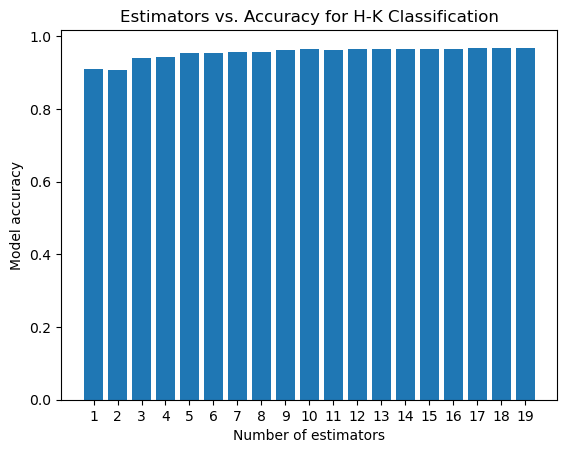

In [11]:
# Ideal number of estimators for H-K classification
avg_hk = rf(x_train_hk.values, x_test_hk.values, y_train_hk.values, y_test_hk.values)
plt.bar(range(1,20), avg_hk)
plt.xticks(range(1,20))
plt.xlabel("Number of estimators")
plt.ylabel("Model accuracy")
plt.title("Estimators vs. Accuracy for H-K Classification")

high_hk = np.max(avg_hk)
index_hk = avg_hk.index(high_hk) + 1
print("Number of estimators with highest accuracy: " + str(index_hk))
print("Accuracy: " + str(high_hk))

Number of estimators with highest accuracy: 12
Accuracy: 0.9964788732394366


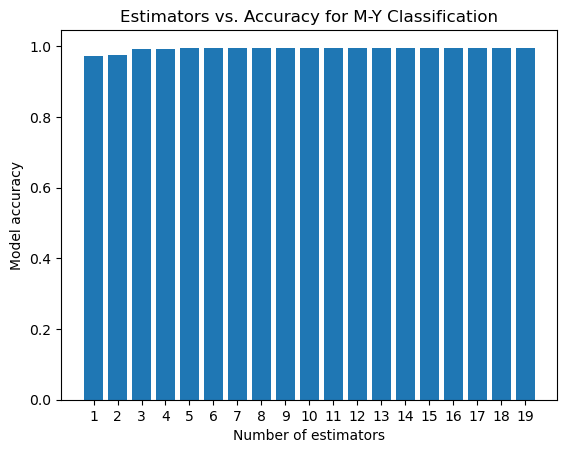

In [12]:
# Ideal number of estimators for M-Y classification
avg_my = rf(x_train_my.values, x_test_my.values, y_train_my.values, y_test_my.values)
plt.bar(range(1,20), avg_my)
plt.xticks(range(1,20))
plt.xlabel("Number of estimators")
plt.ylabel("Model accuracy")
plt.title("Estimators vs. Accuracy for M-Y Classification")

high_my = np.max(avg_my)
index_my = avg_my.index(high_my) + 1
print("Number of estimators with highest accuracy: " + str(index_my))
print("Accuracy: " + str(high_my))

Number of estimators with highest accuracy: 17
Accuracy: 0.9895031284504968


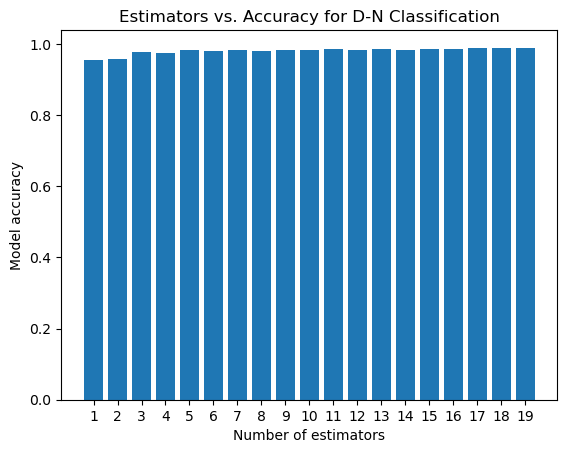

In [13]:
# Ideal number of estimators for D-N classification
avg_dn = rf(x_train_dn.values, x_test_dn.values, y_train_dn.values, y_test_dn.values)
plt.bar(range(1,20), avg_dn)
plt.xticks(range(1,20))
plt.xlabel("Number of estimators")
plt.ylabel("Model accuracy")
plt.title("Estimators vs. Accuracy for D-N Classification")

high_dn = np.max(avg_dn)
index_dn = avg_dn.index(high_dn) + 1
print("Number of estimators with highest accuracy: " + str(index_dn))
print("Accuracy: " + str(high_dn))

In [14]:
# Run random forest with 19 estimators for H-K

# Create random forest classifier
rf_hk = RandomForestClassifier(n_estimators=19, random_state=63130)

# Train model
rf_hk.fit(x_train_hk, y_train_hk)

# Evaluate model
score_hk = rf_hk.score(x_test_hk, y_test_hk)

print("Accuracy of random forest model for H-K classification: " + str(score_hk))

Accuracy of random forest model for H-K classification: 0.9662162162162162


In [15]:
# Run random forest with 12 estimators for M-Y

# Create random forest classifier
rf_my = RandomForestClassifier(n_estimators=12, random_state=63130)

# Train model
rf_my.fit(x_train_my, y_train_my)

# Evaluate model
score_my = rf_my.score(x_test_my, y_test_my)

print("Accuracy of random forest model for M-Y classification: " + str(score_my))

Accuracy of random forest model for M-Y classification: 1.0


In [16]:
# Run random forest with 17 estimators for D-N

# Create random forest classifier
rf_dn = RandomForestClassifier(n_estimators=17, random_state=63130)

# Train model
rf_dn.fit(x_train_dn, y_train_dn)

# Evaluate model
score_dn = rf_dn.score(x_test_dn, y_test_dn)

print("Accuracy of random forest model for D-N classification: " + str(score_dn))

Accuracy of random forest model for D-N classification: 0.9937106918238994


# Model 3: Decision tree

In [17]:
# Determine the max depth with the highest accuracy
def dt(x_train, x_test, y_train, y_test):
    
    avg_accuracy = []
    for i in range(1,20):
        
        # 5-fold cross-validation
        kf = KFold(n_splits=5)
        score_array = []
        for train, test in kf.split(x_train):
        
            # Create decision tree classifier
            dt = DecisionTreeClassifier(max_depth=i, random_state=63130)

            # Train model
            dt.fit(x_train[train], y_train[train])
            
            # Evaluate model accuracy
            score = dt.score(x_train[test], y_train[test])
            score_array.append(score)            
            
        score_avg = np.mean(score_array)
        avg_accuracy.append(score_avg)
        
    return(avg_accuracy)

Max depth with highest accuracy: 12
Accuracy: 0.9418867924528301


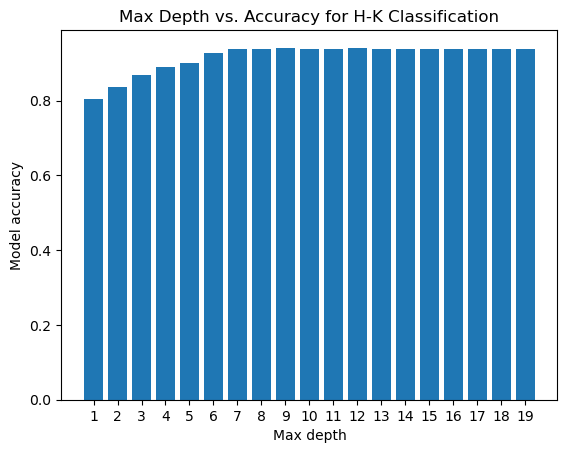

In [18]:
# Ideal max depth for H-K classification
avg_hk = dt(x_train_hk.values, x_test_hk.values, y_train_hk.values, y_test_hk.values)
plt.bar(range(1,20), avg_hk)
plt.xticks(range(1,20))
plt.xlabel("Max depth")
plt.ylabel("Model accuracy")
plt.title("Max Depth vs. Accuracy for H-K Classification")

high_hk = np.max(avg_hk)
index_hk = avg_hk.index(high_hk) + 1
print("Max depth with highest accuracy: " + str(index_hk))
print("Accuracy: " + str(high_hk))

Max depth with highest accuracy: 6
Accuracy: 0.9901408450704224


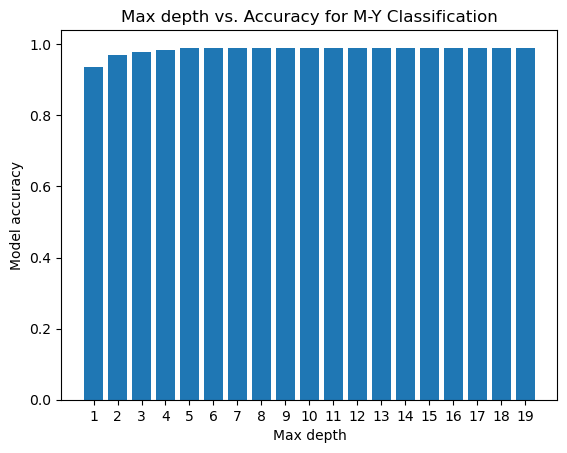

In [19]:
# Ideal max depth for M-Y classification
avg_my = dt(x_train_my.values, x_test_my.values, y_train_my.values, y_test_my.values)
plt.bar(range(1,20), avg_my)
plt.xticks(range(1,20))
plt.xlabel("Max depth")
plt.ylabel("Model accuracy")
plt.title("Max depth vs. Accuracy for M-Y Classification")

high_my = np.max(avg_my)
index_my = avg_my.index(high_my) + 1
print("Max depth with highest accuracy: " + str(index_my))
print("Accuracy: " + str(high_my))

Max depth with highest accuracy: 8
Accuracy: 0.9678076309655257


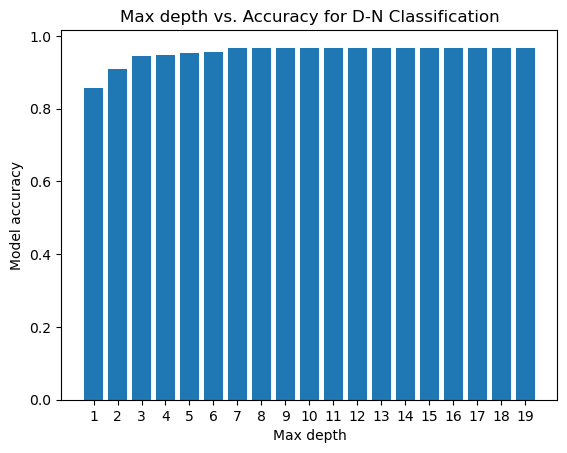

In [20]:
# Ideal max depth for D-N classification
avg_dn = dt(x_train_dn.values, x_test_dn.values, y_train_dn.values, y_test_dn.values)
plt.bar(range(1,20), avg_dn)
plt.xticks(range(1,20))
plt.xlabel("Max depth")
plt.ylabel("Model accuracy")
plt.title("Max depth vs. Accuracy for D-N Classification")

high_dn = np.max(avg_dn)
index_dn = avg_dn.index(high_dn) + 1
print("Max depth with highest accuracy: " + str(index_dn))
print("Accuracy: " + str(high_dn))

In [21]:
# Run decision tree classifier with max depth of 12 for H-K

# Create decision tree classifier
dt_hk = DecisionTreeClassifier(max_depth=12, random_state=63130)

# Train models
dt_hk.fit(x_train_hk, y_train_hk)

# Evaluate model
score_hk = dt_hk.score(x_test_hk, y_test_hk)

print("Accuracy of decision tree model for H-K classification: " + str(score_hk))

Accuracy of decision tree model for H-K classification: 0.9797297297297297


In [22]:
# Run decision tree classifier with max depth of 6 for M-Y

# Create decision tree classifier
dt_my = DecisionTreeClassifier(max_depth=6, random_state=63130)

# Train models
dt_my.fit(x_train_my, y_train_my)

# Evaluate model
score_my = dt_my.score(x_test_my, y_test_my)

print("Accuracy of decision tree model for M-Y classification: " + str(score_my))

Accuracy of decision tree model for M-Y classification: 0.9936708860759493


In [23]:
# Run decision tree classifier with max depth of 8 for D-N

# Create decision tree classifier
dt_dn = DecisionTreeClassifier(max_depth=8, random_state=63130)

# Train models
dt_dn.fit(x_train_dn, y_train_dn)

# Evaluate model
score_dn = dt_dn.score(x_test_dn, y_test_dn)

print("Accuracy of decision tree model for D-N classification: " + str(score_dn))

Accuracy of decision tree model for D-N classification: 0.9748427672955975


# Model 4: SVM

In [24]:
# Determine the kernel with the highest accuracy
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
def svm(x_train, x_test, y_train, y_test):
    
    avg_accuracy = []
    for i in kernels:
        
        # 5-fold cross-validation
        kf = KFold(n_splits=5)
        score_array = []
        for train, test in kf.split(x_train):
        
            # Create decision tree classifier
            svm = SVC(kernel=i, random_state=63130)

            # Train model
            svm.fit(x_train[train], y_train[train])
            
            # Evaluate model accuracy
            score = svm.score(x_train[test], y_train[test])
            score_array.append(score)            
            
        score_avg = np.mean(score_array)
        avg_accuracy.append(score_avg)
        
    return(avg_accuracy)

Kernel with highest accuracy: poly
Accuracy: 0.9743396226415093


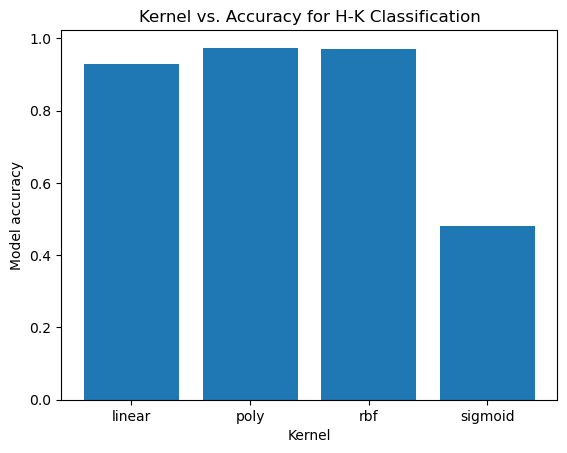

In [25]:
# Ideal kernel for H-K classification
avg_hk = svm(x_train_hk.values, x_test_hk.values, y_train_hk.values, y_test_hk.values)
plt.bar(range(1,5), avg_hk)
plt.xticks(range(1,5),kernels)
plt.xlabel("Kernel")
plt.ylabel("Model accuracy")
plt.title("Kernel vs. Accuracy for H-K Classification")

high_hk = np.max(avg_hk)
index_hk = avg_hk.index(high_hk)
print("Kernel with highest accuracy: " + kernels[index_hk])
print("Accuracy: " + str(high_hk))

Kernel with highest accuracy: poly
Accuracy: 0.9985915492957746


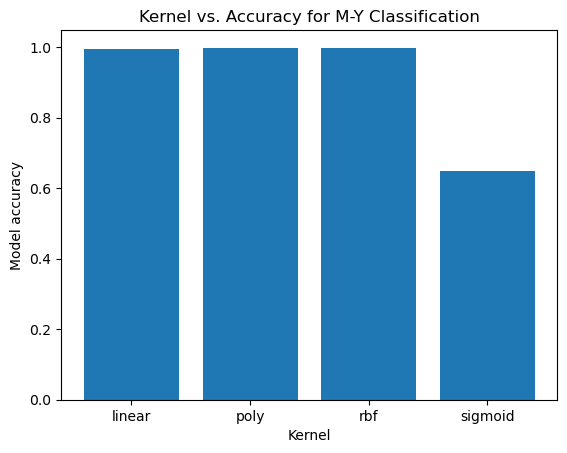

In [26]:
# Ideal kernel for M-Y classification
avg_my = svm(x_train_my.values, x_test_my.values, y_train_my.values, y_test_my.values)
plt.bar(range(1,5), avg_my)
plt.xticks(range(1,5),kernels)
plt.xlabel("Kernel")
plt.ylabel("Model accuracy")
plt.title("Kernel vs. Accuracy for M-Y Classification")

high_my = np.max(avg_my)
index_my = avg_my.index(high_my)
print("Kernel with highest accuracy: " + kernels[index_my])
print("Accuracy: " + str(high_my))

Kernel with highest accuracy: poly
Accuracy: 0.9811017053122317


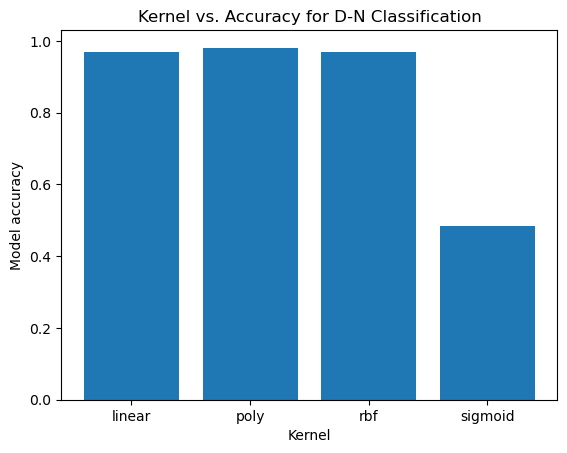

In [27]:
# Ideal kernel for D-N classification
avg_dn = svm(x_train_dn.values, x_test_dn.values, y_train_dn.values, y_test_dn.values)
plt.bar(range(1,5), avg_dn)
plt.xticks(range(1,5),kernels)
plt.xlabel("Kernel")
plt.ylabel("Model accuracy")
plt.title("Kernel vs. Accuracy for D-N Classification")

high_dn = np.max(avg_dn)
index_dn = avg_dn.index(high_dn)
print("Kernel with highest accuracy: " + kernels[index_dn])
print("Accuracy: " + str(high_dn))

In [28]:
# Run SVM with poly kernel for H-K

# Create decision tree classifier
svm_hk = SVC(kernel='poly', random_state=63130)

# Train models
svm_hk.fit(x_train_hk, y_train_hk)

# Evaluate model
score_hk = svm_hk.score(x_test_hk, y_test_hk)

print("Accuracy of SVM model for H-K classification: " + str(score_hk))

Accuracy of SVM model for H-K classification: 0.9864864864864865


In [29]:
# Run SVM with poly kernel for M-Y

# Create decision tree classifier
svm_my = SVC(kernel='poly', random_state=63130)

# Train models
svm_my.fit(x_train_my, y_train_my)

# Evaluate model
score_my = svm_my.score(x_test_my, y_test_my)

print("Accuracy of SVM model for M-Y classification: " + str(score_my))

Accuracy of SVM model for M-Y classification: 1.0


In [30]:
# Run SVM with poly kernel for D-N

# Create decision tree classifier
svm_dn = SVC(kernel='poly', random_state=63130)

# Train models
svm_dn.fit(x_train_dn, y_train_dn)

# Evaluate model
score_dn = svm_dn.score(x_test_dn, y_test_dn)

print("Accuracy of SVM model for D-N classification: " + str(score_dn))

Accuracy of SVM model for D-N classification: 0.9937106918238994


# Dimension reduction

In [31]:
# Dimension reduction for H-K
hk_selector = SelectKBest(k=4)
x_train_hk_reduced = hk_selector.fit_transform(x_train_hk, y_train_hk)
x_test_hk_reduced = hk_selector.transform(x_test_hk)

# Dimension reduction for M-Y
my_selector = SelectKBest(k=4)
x_train_my_reduced = my_selector.fit_transform(x_train_my, y_train_my)
x_test_my_reduced = my_selector.transform(x_test_my)

# Dimension reduction for D-N
dn_selector = SelectKBest(k=4)
x_train_dn_reduced = dn_selector.fit_transform(x_train_dn, y_train_dn)
x_test_dn_reduced = dn_selector.transform(x_test_dn)

# Model 1b: K-nearest neighbors with dimension reduction

Number of neighbors with highest accuracy: 9
Accuracy: 0.9162264150943397


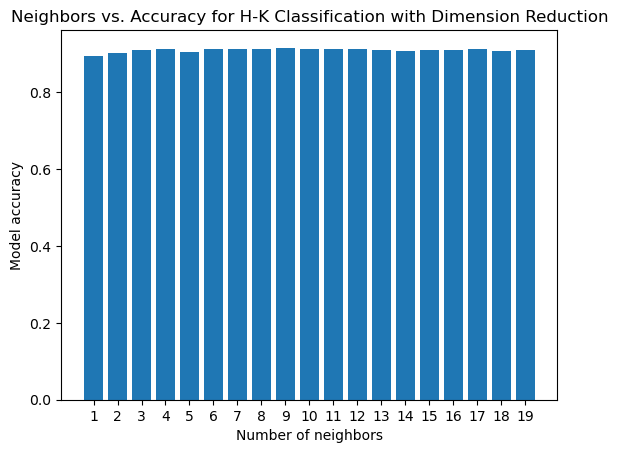

In [32]:
# Ideal number of neighbors for H-K classification with dimension reduction
avg_hk = knn(x_train_hk_reduced, x_test_hk_reduced, y_train_hk.values, y_test_hk.values)
plt.bar(range(1,20), avg_hk)
plt.xticks(range(1,20))
plt.xlabel("Number of neighbors")
plt.ylabel("Model accuracy")
plt.title("Neighbors vs. Accuracy for H-K Classification with Dimension Reduction")

high_hk = np.max(avg_hk)
index_hk = avg_hk.index(high_hk) + 1
print("Number of neighbors with highest accuracy: " + str(index_hk))
print("Accuracy: " + str(high_hk))

Number of neighbors with highest accuracy: 1
Accuracy: 0.995774647887324


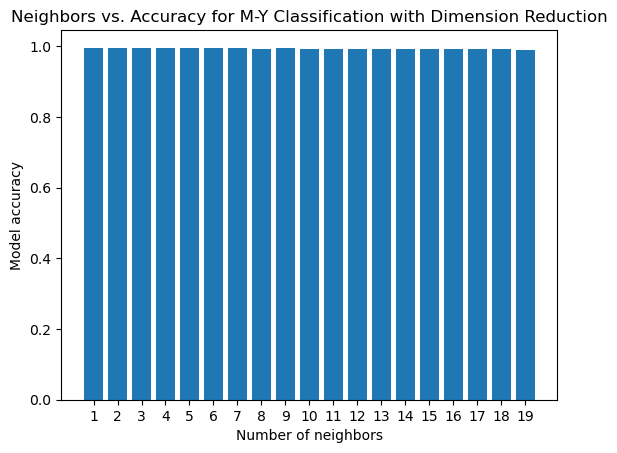

In [33]:
# Ideal number of neighbors for M-Y classification with dimension reduction
avg_my = knn(x_train_my_reduced, x_test_my_reduced, y_train_my.values, y_test_my.values)
plt.bar(range(1,20), avg_my)
plt.xticks(range(1,20))
plt.xlabel("Number of neighbors")
plt.ylabel("Model accuracy")
plt.title("Neighbors vs. Accuracy for M-Y Classification with Dimension Reduction")

high_my = np.max(avg_my)
index_my = avg_my.index(high_my) + 1
print("Number of neighbors with highest accuracy: " + str(index_my))
print("Accuracy: " + str(high_my))

Number of neighbors with highest accuracy: 5
Accuracy: 0.9650079744816586


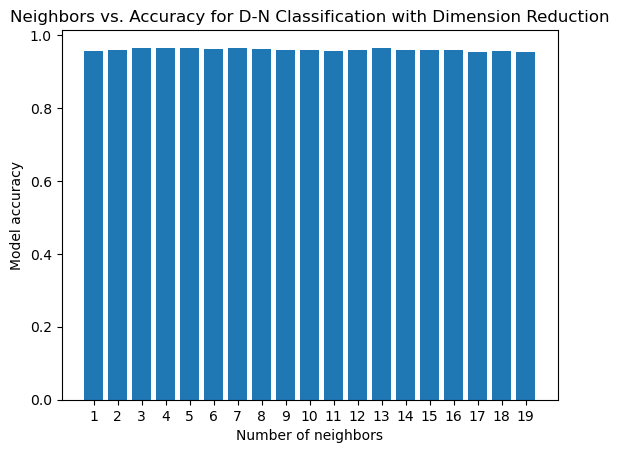

In [34]:
# Ideal number of neighbors for D-N classification with dimension reduction
avg_dn = knn(x_train_dn_reduced, x_test_dn_reduced, y_train_dn.values, y_test_dn.values)
plt.bar(range(1,20), avg_dn)
plt.xticks(range(1,20))
plt.xlabel("Number of neighbors")
plt.ylabel("Model accuracy")
plt.title("Neighbors vs. Accuracy for D-N Classification with Dimension Reduction")

high_dn = np.max(avg_dn)
index_dn = avg_dn.index(high_dn) + 1
print("Number of neighbors with highest accuracy: " + str(index_dn))
print("Accuracy: " + str(high_dn))

In [35]:
# Run KNN with 9 neighbors for H-K

# Create KNN Classifier
knn_hk = KNeighborsClassifier(n_neighbors=9)

# Train model
knn_hk.fit(x_train_hk_reduced, y_train_hk)

# Evaluate model
score_hk = knn_hk.score(x_test_hk_reduced, y_test_hk)

print("Accuracy of KNN model for H-K classification with dimension reduction: " + str(score_hk))

Accuracy of KNN model for H-K classification with dimension reduction: 0.9121621621621622


In [36]:
# Run KNN with 1 neighbor for M-Y

# Create KNN Classifier
knn_my = KNeighborsClassifier(n_neighbors=1)

# Train model
knn_my.fit(x_train_my_reduced, y_train_my)

# Evaluate model
score_my = knn_my.score(x_test_my_reduced, y_test_my)

print("Accuracy of KNN model for M-Y classification with dimension reduction: " + str(score_my))

Accuracy of KNN model for M-Y classification with dimension reduction: 1.0


In [37]:
# Run KNN with 5 neighbors for D-N

# Create KNN Classifier
knn_dn = KNeighborsClassifier(n_neighbors=5)

# Train model
knn_dn.fit(x_train_dn_reduced, y_train_dn)

# Evaluate model
score_dn = knn_dn.score(x_test_dn_reduced, y_test_dn)

print("Accuracy of KNN model for D-N classification with dimension reduction: " + str(score_dn))

Accuracy of KNN model for D-N classification with dimension reduction: 0.9748427672955975


# Model 2b: Random forest with dimension reduction

Number of estimators with highest accuracy: 10
Accuracy: 0.9132075471698113


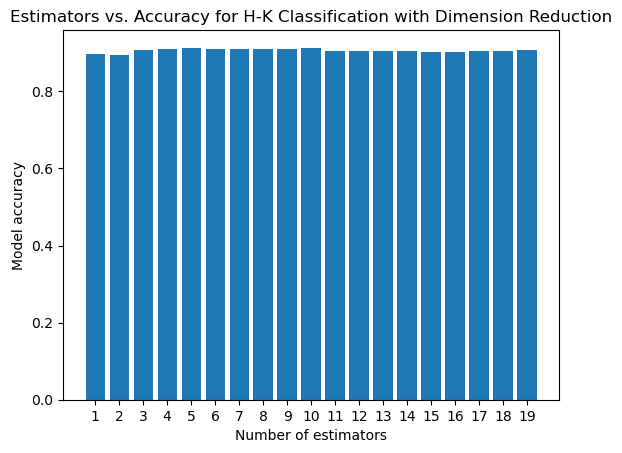

In [38]:
# Ideal number of estimators for H-K classification with dimension reduction
avg_hk = rf(x_train_hk_reduced, x_test_hk_reduced, y_train_hk.values, y_test_hk.values)
plt.bar(range(1,20), avg_hk)
plt.xticks(range(1,20))
plt.xlabel("Number of estimators")
plt.ylabel("Model accuracy")
plt.title("Estimators vs. Accuracy for H-K Classification with Dimension Reduction")

high_hk = np.max(avg_hk)
index_hk = avg_hk.index(high_hk) + 1
print("Number of estimators with highest accuracy: " + str(index_hk))
print("Accuracy: " + str(high_hk))

Number of estimators with highest accuracy: 8
Accuracy: 0.9950704225352112


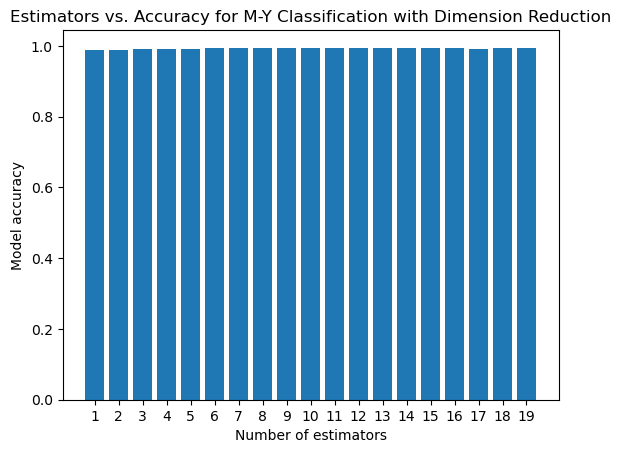

In [39]:
# Ideal number of estimators for M-Y classification with dimension reduction
avg_my = rf(x_train_my_reduced, x_test_my_reduced, y_train_my.values, y_test_my.values)
plt.bar(range(1,20), avg_my)
plt.xticks(range(1,20))
plt.xlabel("Number of estimators")
plt.ylabel("Model accuracy")
plt.title("Estimators vs. Accuracy for M-Y Classification with Dimension Reduction")

high_my = np.max(avg_my)
index_my = avg_my.index(high_my) + 1
print("Number of estimators with highest accuracy: " + str(index_my))
print("Accuracy: " + str(high_my))

Number of estimators with highest accuracy: 11
Accuracy: 0.9622107716844559


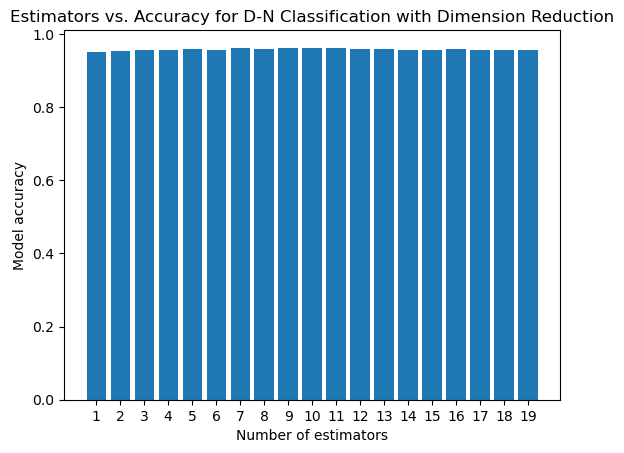

In [40]:
# Ideal number of estimators for D-N classification with dimension reduction
avg_dn = rf(x_train_dn_reduced, x_test_dn_reduced, y_train_dn.values, y_test_dn.values)
plt.bar(range(1,20), avg_dn)
plt.xticks(range(1,20))
plt.xlabel("Number of estimators")
plt.ylabel("Model accuracy")
plt.title("Estimators vs. Accuracy for D-N Classification with Dimension Reduction")

high_dn = np.max(avg_dn)
index_dn = avg_dn.index(high_dn) + 1
print("Number of estimators with highest accuracy: " + str(index_dn))
print("Accuracy: " + str(high_dn))

In [41]:
# Run random forest with 10 estimators for H-K

# Create random forest classifier
rf_hk = RandomForestClassifier(n_estimators=10, random_state=63130)

# Train model
rf_hk.fit(x_train_hk_reduced, y_train_hk)

# Evaluate model
score_hk = rf_hk.score(x_test_hk_reduced, y_test_hk)

print("Accuracy of random forest model for H-K classification with dimension reduction: " + str(score_hk))

Accuracy of random forest model for H-K classification with dimension reduction: 0.8918918918918919


In [42]:
# Run random forest with 8 estimators for M-Y

# Create random forest classifier
rf_my = RandomForestClassifier(n_estimators=8, random_state=63130)

# Train model
rf_my.fit(x_train_my_reduced, y_train_my)

# Evaluate model
score_my = rf_my.score(x_test_my_reduced, y_test_my)

print("Accuracy of random forest model for M-Y classification with dimension reduction: " + str(score_my))

Accuracy of random forest model for M-Y classification with dimension reduction: 1.0


In [43]:
# Run random forest with 11 estimators for D-N

# Create random forest classifier
rf_dn = RandomForestClassifier(n_estimators=11, random_state=63130)

# Train model
rf_dn.fit(x_train_dn_reduced, y_train_dn)

# Evaluate model
score_dn = rf_dn.score(x_test_dn_reduced, y_test_dn)

print("Accuracy of random forest model for D-N classification with dimension reduction: " + str(score_dn))

Accuracy of random forest model for D-N classification with dimension reduction: 0.9622641509433962


# Model 3b: Decision tree with dimension reduction

Max depth with highest accuracy: 8
Accuracy: 0.9132075471698113


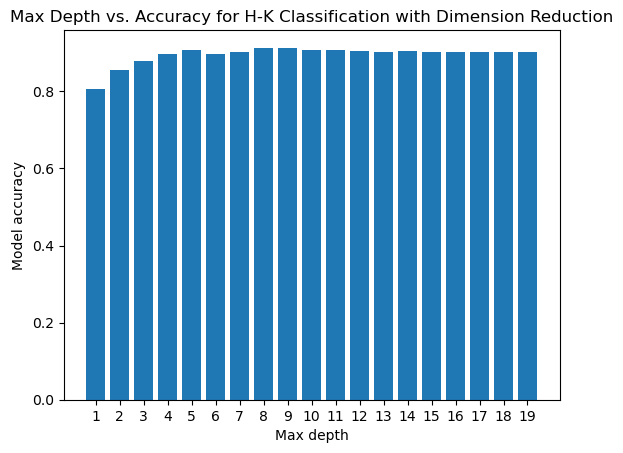

In [44]:
# Ideal max depth for H-K classification with dimension reduction
avg_hk = dt(x_train_hk_reduced, x_test_hk_reduced, y_train_hk.values, y_test_hk.values)
plt.bar(range(1,20), avg_hk)
plt.xticks(range(1,20))
plt.xlabel("Max depth")
plt.ylabel("Model accuracy")
plt.title("Max Depth vs. Accuracy for H-K Classification with Dimension Reduction")

high_hk = np.max(avg_hk)
index_hk = avg_hk.index(high_hk) + 1
print("Max depth with highest accuracy: " + str(index_hk))
print("Accuracy: " + str(high_hk))

Max depth with highest accuracy: 7
Accuracy: 0.9922535211267606


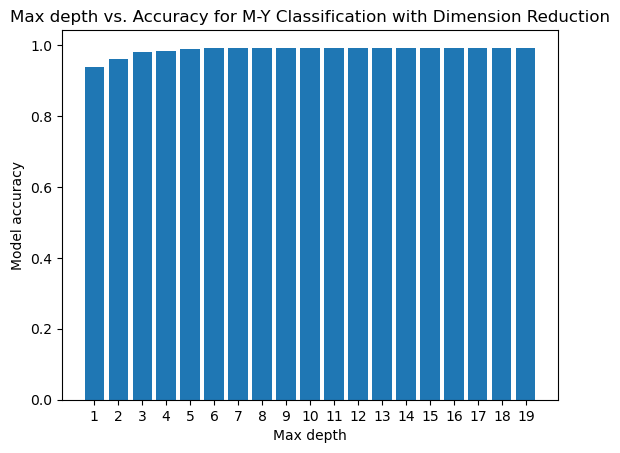

In [45]:
# Ideal max depth for M-Y classification with dimension reduction
avg_my = dt(x_train_my_reduced, x_test_my_reduced, y_train_my.values, y_test_my.values)
plt.bar(range(1,20), avg_my)
plt.xticks(range(1,20))
plt.xlabel("Max depth")
plt.ylabel("Model accuracy")
plt.title("Max depth vs. Accuracy for M-Y Classification with Dimension Reduction")

high_my = np.max(avg_my)
index_my = avg_my.index(high_my) + 1
print("Max depth with highest accuracy: " + str(index_my))
print("Accuracy: " + str(high_my))

Max depth with highest accuracy: 14
Accuracy: 0.9573107594160225


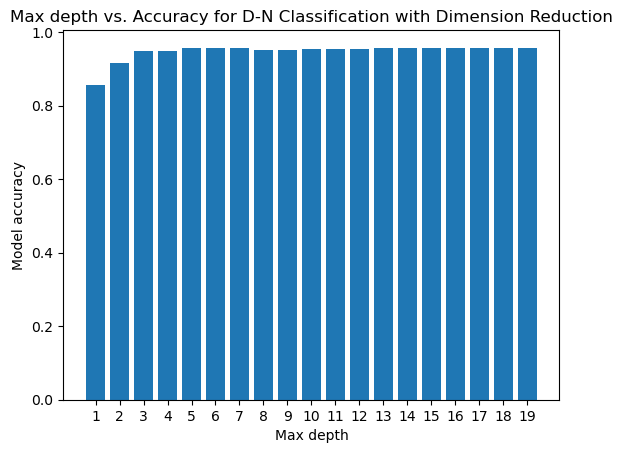

In [46]:
# Ideal max depth for D-N classification with dimension reduction
avg_dn = dt(x_train_dn_reduced, x_test_dn_reduced, y_train_dn.values, y_test_dn.values)
plt.bar(range(1,20), avg_dn)
plt.xticks(range(1,20))
plt.xlabel("Max depth")
plt.ylabel("Model accuracy")
plt.title("Max depth vs. Accuracy for D-N Classification with Dimension Reduction")

high_dn = np.max(avg_dn)
index_dn = avg_dn.index(high_dn) + 1
print("Max depth with highest accuracy: " + str(index_dn))
print("Accuracy: " + str(high_dn))

In [47]:
# Run decision tree classifier with max depth of 8 for H-K with dimension reduction

# Create decision tree classifier
dt_hk = DecisionTreeClassifier(max_depth=8, random_state=63130)

# Train models
dt_hk.fit(x_train_hk_reduced, y_train_hk)

# Evaluate model
score_hk = dt_hk.score(x_test_hk_reduced, y_test_hk)

print("Accuracy of decision tree model for H-K classification with dimension reduction: " + str(score_hk))

Accuracy of decision tree model for H-K classification with dimension reduction: 0.9121621621621622


In [48]:
# Run decision tree classifier with max depth of 7 for M-Y with dimension reduction

# Create decision tree classifier
dt_my = DecisionTreeClassifier(max_depth=7, random_state=63130)

# Train models
dt_my.fit(x_train_my_reduced, y_train_my)

# Evaluate model
score_my = dt_my.score(x_test_my_reduced, y_test_my)

print("Accuracy of decision tree model for M-Y classification with dimension reduction: " + str(score_my))

Accuracy of decision tree model for M-Y classification with dimension reduction: 0.9936708860759493


In [49]:
# Run decision tree classifier with max depth of 14 for D-N with dimension reduction

# Create decision tree classifier
dt_dn = DecisionTreeClassifier(max_depth=14, random_state=63130)

# Train models
dt_dn.fit(x_train_dn_reduced, y_train_dn)

# Evaluate model
score_dn = dt_dn.score(x_test_dn_reduced, y_test_dn)

print("Accuracy of decision tree model for D-N classification with dimension reduction: " + str(score_dn))

Accuracy of decision tree model for D-N classification with dimension reduction: 0.9622641509433962


# Model 4b: SVM with dimension reduction

Kernel with highest accuracy: poly
Accuracy: 0.909433962264151


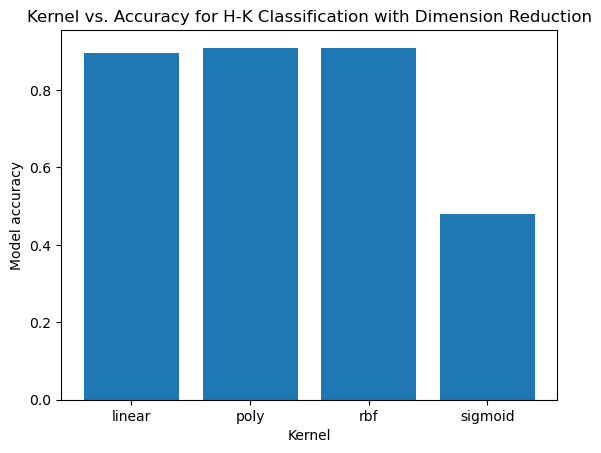

In [50]:
# Ideal kernel for H-K classification with dimension reduction
avg_hk = svm(x_train_hk_reduced, x_test_hk_reduced, y_train_hk.values, y_test_hk.values)
plt.bar(range(1,5), avg_hk)
plt.xticks(range(1,5),kernels)
plt.xlabel("Kernel")
plt.ylabel("Model accuracy")
plt.title("Kernel vs. Accuracy for H-K Classification with Dimension Reduction")

high_hk = np.max(avg_hk)
index_hk = avg_hk.index(high_hk)
print("Kernel with highest accuracy: " + kernels[index_hk])
print("Accuracy: " + str(high_hk))

Kernel with highest accuracy: poly
Accuracy: 0.9908450704225352


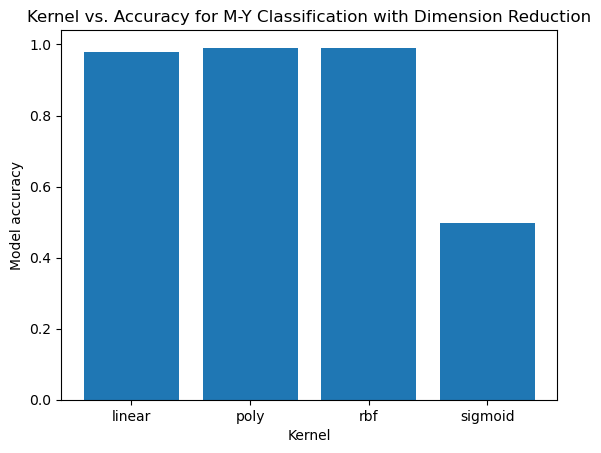

In [51]:
# Ideal kernel for M-Y classification with dimension reduction
avg_my = svm(x_train_my_reduced, x_test_my_reduced, y_train_my.values, y_test_my.values)
plt.bar(range(1,5), avg_my)
plt.xticks(range(1,5),kernels)
plt.xlabel("Kernel")
plt.ylabel("Model accuracy")
plt.title("Kernel vs. Accuracy for M-Y Classification with Dimension Reduction")

high_my = np.max(avg_my)
index_my = avg_my.index(high_my)
print("Kernel with highest accuracy: " + kernels[index_my])
print("Accuracy: " + str(high_my))

Kernel with highest accuracy: poly
Accuracy: 0.9552054962581279


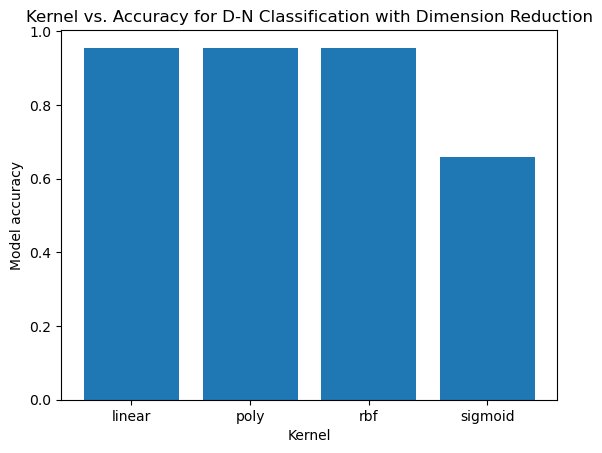

In [52]:
# Ideal kernel for D-N classification with dimension reduction
avg_dn = svm(x_train_dn_reduced, x_test_dn_reduced, y_train_dn.values, y_test_dn.values)
plt.bar(range(1,5), avg_dn)
plt.xticks(range(1,5),kernels)
plt.xlabel("Kernel")
plt.ylabel("Model accuracy")
plt.title("Kernel vs. Accuracy for D-N Classification with Dimension Reduction")

high_dn = np.max(avg_dn)
index_dn = avg_dn.index(high_dn)
print("Kernel with highest accuracy: " + kernels[index_dn])
print("Accuracy: " + str(high_dn))

In [53]:
# Run SVM with poly kernel for H-K with dimension reduction

# Create decision tree classifier
svm_hk = SVC(kernel='poly', random_state=63130)

# Train models
svm_hk.fit(x_train_hk_reduced, y_train_hk)

# Evaluate model
score_hk = svm_hk.score(x_test_hk_reduced, y_test_hk)

print("Accuracy of SVM model for H-K classification with dimension reduction: " + str(score_hk))

Accuracy of SVM model for H-K classification with dimension reduction: 0.8918918918918919


In [54]:
# Run SVM with poly kernel for M-Y with dimension reduction

# Create decision tree classifier
svm_my = SVC(kernel='poly', random_state=63130)

# Train models
svm_my.fit(x_train_my_reduced, y_train_my)

# Evaluate model
score_my = svm_my.score(x_test_my_reduced, y_test_my)

print("Accuracy of SVM model for M-Y classification with dimension reduction: " + str(score_my))

Accuracy of SVM model for M-Y classification with dimension reduction: 1.0


In [55]:
# Run SVM with poly kernel for D-N with dimension reduction

# Create decision tree classifier
svm_dn = SVC(kernel='poly', random_state=63130)

# Train models
svm_dn.fit(x_train_dn_reduced, y_train_dn)

# Evaluate model
score_dn = svm_dn.score(x_test_dn_reduced, y_test_dn)

print("Accuracy of SVM model for D-N classification with dimension reduction: " + str(score_dn))

Accuracy of SVM model for D-N classification with dimension reduction: 0.9433962264150944
